In [2]:
import fastf1
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs('cache', exist_ok=True)

fastf1.Cache.enable_cache('cache')

session = fastf1.get_session(2025, 'British Grand Prix', 'R')
session.load()


core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

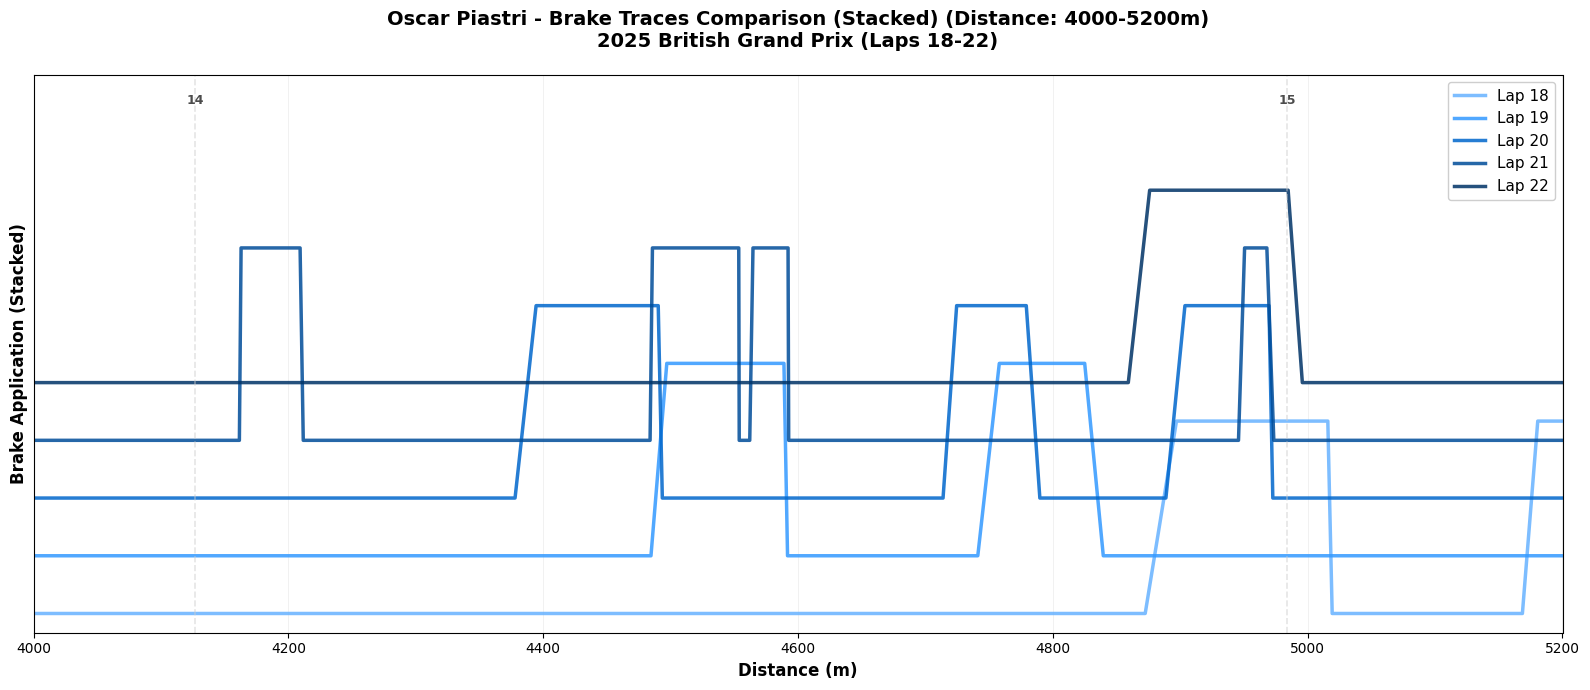

In [4]:
circuit_info = session.get_circuit_info()

piastri_laps = session.laps.pick_drivers('PIA')

laps_to_compare = [18, 19, 20, 21, 22]

# Set to None to view the full lap
zoom_start = 4000
zoom_end = 5200

colors = ['#66B2FF', '#3399FF', '#0066CC', '#004C99', '#003366']

fig, ax = plt.subplots(figsize=(16, 7), facecolor='white')
ax.set_facecolor('white')

offset_increment = 0.3
for i, lap_number in enumerate(laps_to_compare):
    lap = piastri_laps[piastri_laps['LapNumber'] == lap_number].iloc[0]
    telemetry = lap.get_telemetry()

    brake_offset = telemetry['Brake'] + (i * offset_increment)

    ax.plot(telemetry['Distance'], brake_offset, 
            label=f'Lap {lap_number}', linewidth=2.5, color=colors[i], alpha=0.85)

# Add vertical lines for corner positions
y_max = len(laps_to_compare) * offset_increment + 1.1
for _, corner in circuit_info.corners.iterrows():
    # Only show corners within zoom range if zoom is active
    if zoom_start is not None and zoom_end is not None:
        if corner['Distance'] < zoom_start or corner['Distance'] > zoom_end:
            continue

    ax.axvline(x=corner['Distance'], color='#CCCCCC', linestyle='--', 
               alpha=0.5, linewidth=1.2)

    # Add corner number labels at the top with better visibility
    corner_label = f"{corner['Number']}{corner['Letter']}" if corner['Letter'] else str(corner['Number'])
    ax.text(corner['Distance'], y_max + 0.05, corner_label, 
            rotation=0, horizontalalignment='center',
            fontsize=9, alpha=0.7, fontweight='bold')

# Apply zoom if specified
if zoom_start is not None and zoom_end is not None:
    ax.set_xlim(zoom_start, zoom_end)
    title_suffix = f' (Distance: {zoom_start}-{zoom_end}m)'
else:
    title_suffix = ''

ax.set_xlabel('Distance (m)', fontsize=12, fontweight='bold')
ax.set_ylabel('Brake Application (Stacked)', fontsize=12, fontweight='bold')
ax.set_title(f'Oscar Piastri - Brake Traces Comparison (Stacked){title_suffix}\n2025 British Grand Prix (Laps 18-22)', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.25, linewidth=0.5, axis='x')
ax.set_ylim(-0.1, y_max + 0.2)

ax.set_yticks([])

plt.tight_layout()
plt.show()